In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Exploring the data

In [2]:
df = pd.read_csv('Customer Churn.csv')

In [3]:
df.shape

(3150, 16)

In [4]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  FN                       3150 non-null   float64
 14  FP                      

In [6]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
FN                         0
FP                         0
Churn                      0
dtype: int64

In [7]:
df.duplicated().sum()

300

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
df.shape

(2850, 16)

In [11]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,7.802456,0.080702,32.452982,0.974737,4534.243158,70.484912,73.789825,23.870526,2.835088,1.080351,1.240000,31.077193,474.990367,427.491330,98.591449,0.156491
std,7.326172,0.272424,8.723075,1.550618,4199.712303,57.401512,112.062397,17.193929,0.893503,0.271883,0.427158,8.861934,514.442198,462.997978,50.551989,0.363384
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,60.000000,0.000000
25%,1.000000,0.000000,29.000000,0.000000,1458.750000,28.000000,7.000000,11.000000,2.000000,1.000000,1.000000,25.000000,117.527500,105.774750,61.752750,0.000000
50%,6.000000,0.000000,35.000000,0.000000,3041.000000,54.500000,22.000000,21.000000,3.000000,1.000000,1.000000,30.000000,232.520000,209.268000,73.252000,0.000000
75%,12.000000,0.000000,38.000000,2.000000,6500.000000,96.000000,88.000000,34.000000,3.000000,1.000000,1.000000,30.000000,790.080000,711.072000,129.008000,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1948.752000,266.528000,1.000000


Text(0.5, 1.0, 'Distribution of Churn')

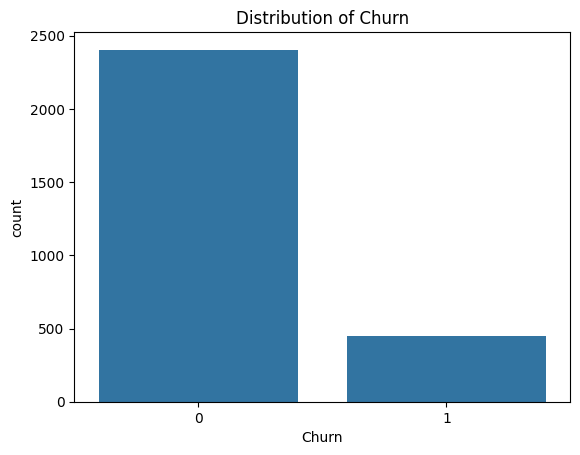

In [12]:
sns.countplot(
    x='Churn',
    data=df,
)
plt.title('Distribution of Churn')

In [13]:
df['Churn'].value_counts()

Churn
0    2404
1     446
Name: count, dtype: int64

<Axes: >

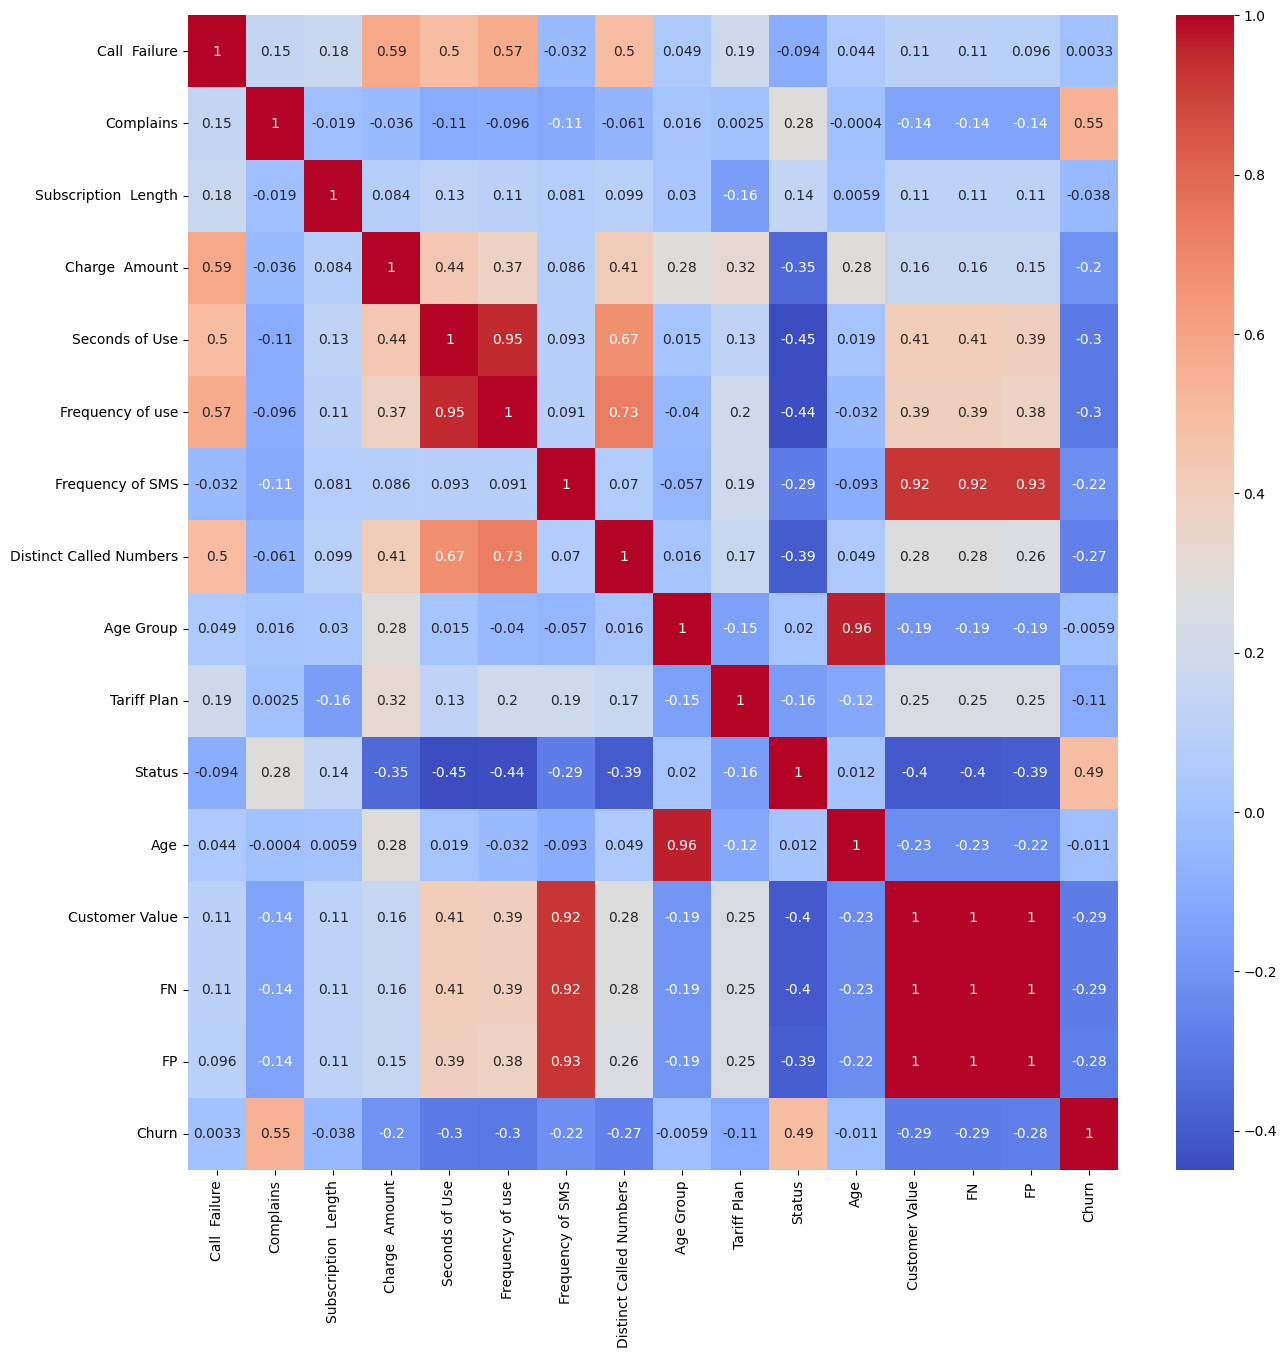

In [14]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

I decided to remove Age Group, Age is enough.

I decided to remove Frequency of use because it seems like it was calculated from Seconds of use.

I also decide to remove FN et FP as they seem to be calculated from each other with Customer Value.

As the call failure and churn correclation is less than 0.01, i will remove it.


In [15]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'FN', 'FP', 'Churn'],
      dtype='object')

<Axes: >

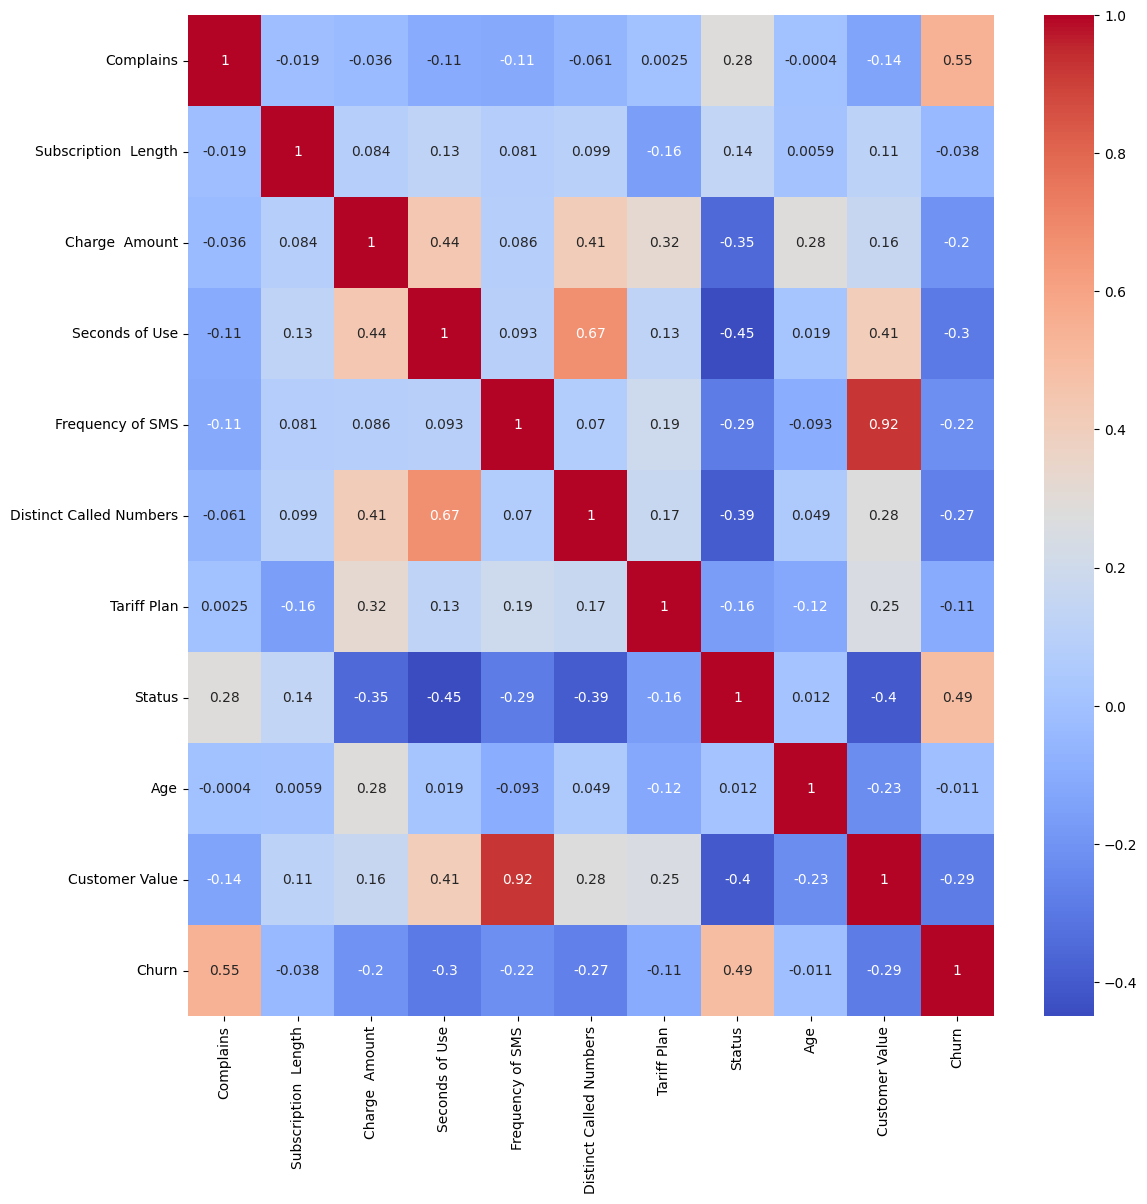

In [16]:
df_cleaned = df.drop(columns=['Age Group', 'Frequency of use', 'FN', 'FP', 'Call  Failure'])
plt.figure(figsize=(13, 13))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')

Classification

In [17]:
df_cleaned.describe()

,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of SMS,Distinct Called Numbers,Tariff Plan,Status,Age,Customer Value,Churn
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,0.080702,32.452982,0.974737,4534.243158,73.789825,23.870526,1.080351,1.240000,31.077193,474.990367,0.156491
std,0.272424,8.723075,1.550618,4199.712303,112.062397,17.193929,0.271883,0.427158,8.861934,514.442198,0.363384
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,0.000000,29.000000,0.000000,1458.750000,7.000000,11.000000,1.000000,1.000000,25.000000,117.527500,0.000000
50%,0.000000,35.000000,0.000000,3041.000000,22.000000,21.000000,1.000000,1.000000,30.000000,232.520000,0.000000
75%,0.000000,38.000000,2.000000,6500.000000,88.000000,34.000000,1.000000,1.000000,30.000000,790.080000,0.000000
max,1.000000,47.000000,10.000000,17090.000000,522.000000,97.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X = df.drop(columns=['Churn'])
y = df['Churn']

X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)


# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
4,Seconds of Use,970973.12
12,Customer Value,130914.52
13,FN,117838.53
6,Frequency of SMS,23231.88
5,Frequency of use,11875.30
14,FP,5668.57
7,Distinct Called Numbers,2578.76
1,Complains,781.22
3,Charge Amount,285.80
10,Status,101.84


After using the same technique used in class, i concluded that my decision to remove certain variables was right

In [ ]:
!pip install imbalanced-learn
# After looking online and asking AI tools, I found that imbalanced-learn is a useful library
# to deal with imbalanced datasets
# Also i needed to Standardize the data for better results

In [ ]:
X = df_cleaned.drop(columns=['Churn'])
Y = df_cleaned['Churn']

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(X, Y)

# Data Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()



,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of SMS,Distinct Called Numbers,Tariff Plan,Status,Age,Customer Value
0,-0.40,0.68,-0.49,0.27,-0.49,-0.15,-0.23,-0.82,-0.12,-0.31
1,-0.40,0.79,-0.49,-0.84,-0.47,-0.98,-0.23,1.23,-0.76,-0.66
2,-0.40,0.56,-0.49,-0.25,3.36,0.30,-0.23,-0.82,-0.12,2.75
3,-0.40,0.68,-0.49,0.23,-0.54,1.00,-0.23,-0.82,-2.03,-0.22
4,-0.40,0.68,-0.49,-0.27,-0.52,0.87,-0.23,-0.82,-2.03,-0.43


In [ ]:
# Train-Test-Validation Split
X_train, X_temp, Y_train, Y_temp = train_test_split(X_scaled, Y, test_size=0.35)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape)
print(Y_train.shape, Y_val.shape, Y_test.shape)

(3125, 10) (841, 10) (842, 10)
(3125,) (841,) (842,)
(4808, 10) (4808,)


### Create the neural network structure

In [ ]:
import tensorflow as tf
import keras
from keras import layers

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

model = keras.Sequential([
    layers.BatchNormalization(input_shape=(len(X_scaled.columns),)),
    layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # it's one output
])

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\Chourouk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
# train/fit neural network with validation data
# see the instructions on the train/test -split above on how to split the data correctly
model.fit(x=X_train, y=Y_train, epochs=300, validation_data=(X_val, Y_val))

Epoch 1/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5622 - loss: 3.5833 - val_accuracy: 0.6540 - val_loss: 2.8719
Epoch 2/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6934 - loss: 2.3219 - val_accuracy: 0.7455 - val_loss: 1.8056
Epoch 3/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7542 - loss: 1.4361 - val_accuracy: 0.7824 - val_loss: 1.1051
Epoch 4/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7786 - loss: 0.9031 - val_accuracy: 0.7955 - val_loss: 0.7364
Epoch 5/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8070 - loss: 0.6526 - val_accuracy: 0.8181 - val_loss: 0.5866
Epoch 6/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8099 - loss: 0.5715 - val_accuracy: 0.8193 - val_loss: 0.5465
Epoch 7/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8106 - loss: 0.5381 - val_accuracy: 0.8169 - val_loss: 0.5222
Epoch 8/300
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8170 - loss: 0.5226 - val_accuracy: 0.7955 - v

<Axes: >

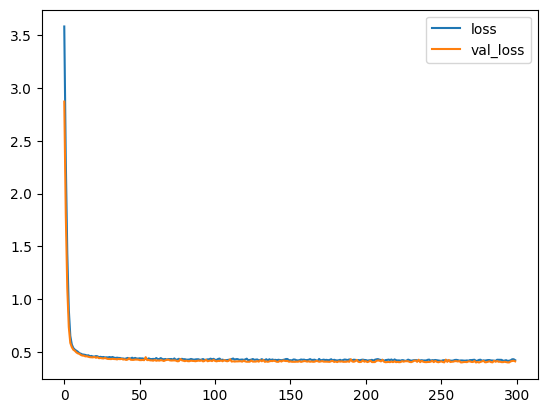

In [56]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()
# Both the training and validation loss decreased rapidly and then stabilized around the same value, indicating that the model learned effectively.
# The close alignment of the two curves suggests good generalization and no signs of overfitting.


<Axes: >

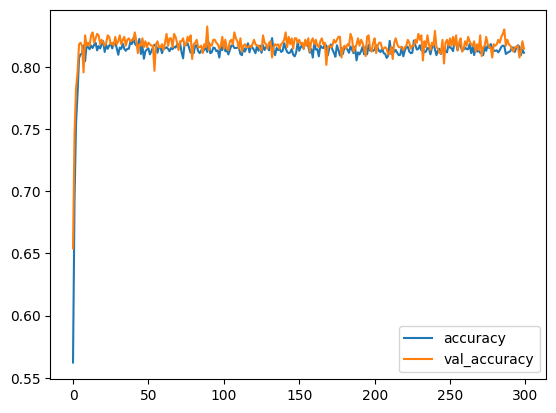

In [57]:
loss_df[['accuracy', 'val_accuracy']].plot()
# The training and validation accuracy quickly increased and remained stable around 82%, showing that the model converged well.

In [58]:

print("Test data evaluation:")
print(model.evaluate(X_test, Y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, Y_train, verbose=0))

Test data evaluation:
[0.4019698202610016, 0.8171021342277527]

Train data evaluation:
[0.41254180669784546, 0.8169599771499634]


In [ ]:
# The function model.predict(X_test) returns the probabilities that each sample belongs to class 1 (in your case, churn).
# However, to calculate a confusion matrix or a classification report, we need binary class predictions (0 or 1), not continuous probabilities between 0 and 1.

# model.predict(X_test) > 0.5 → converts probabilities into True/False values depending on whether they exceed 0.5.
# .astype(int) → converts True/False into 0 or 1, which can be used in a confusion matrix and other metrics.

test_predictions = (model.predict(X_test) > 0.5).astype(int)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<Axes: >

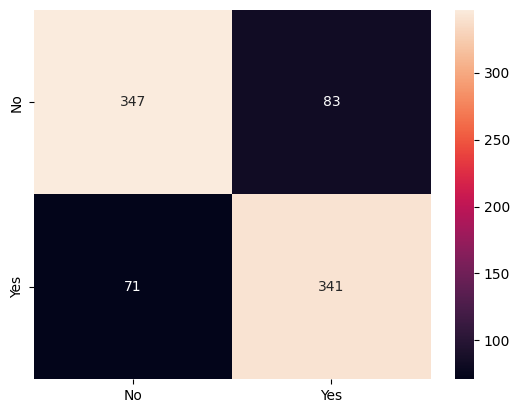

In [71]:
# confusion matrix
sns.heatmap(confusion_matrix(Y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=['No','Yes'], yticklabels=['No','Yes'])

In [74]:
# print the classification report based on true values and predictions
print(classification_report(Y_test, test_predictions, target_names=['No','Yes']))

# get overall accuracy of the model and print it
acc = accuracy_score(Y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

          No       0.83      0.81      0.82       430
         Yes       0.80      0.83      0.82       412

    accuracy                           0.82       842
   macro avg       0.82      0.82      0.82       842
weighted avg       0.82      0.82      0.82       842


Model overall accuracy: 81.71%


In [77]:
roc_auc_score(Y, model.predict(X_scaled), multi_class="ovr")

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step


0.9001492589998367

### Test the model in practice with new data

In [ ]:
tester_row = {
    'Complains' : np.random.choice([0, 1]),
    'Subscription  Length' : np.random.randint(3, 48),
    'Charge  Amount' : np.random.choice([0, 1,2,3,4,5,6,7,8,9,10]),
    'Seconds of Use' : np.random.randint(0, 17091),
    'Frequency of SMS': np.random.randint(0, 523),
    'Distinct Called Numbers': np.random.randint(0, 97),
    'Tariff Plan': np.random.choice([1, 2]),
    'Status': np.random.choice([1, 2]),
    'Age': np.random.randint(15,55),
    'Customer Value': np.round(np.random.randint(0, 2165.28)),
    'Churn' : np.random.choice([0, 1])
}

data_test = pd.DataFrame([tester_row])

data_test_X = data_test.drop(columns=['Churn'])
data_test_Y = data_test['Churn']

data_test_scaled = scaler.transform(data_test_X)
data_test_scaled = pd.DataFrame(data_test_scaled, columns=data_test_X.columns)

prediction = model.predict(data_test_scaled)

prediction_class = (prediction > 0.5).astype(int)

categories = pd.DataFrame({
    "No churn": [1 - prediction[0][0]],
    "Churn": [prediction[0][0]]
})

print(categories)

print(f"The predicted class is : {prediction_class[0][0]}")

print(f"The actual class is : {data_test_Y.values[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
   No churn  Churn
0      0.97   0.03
The predicted class is : 0
The actual class is : 0
